<a href="https://colab.research.google.com/github/evgeny-kolonsky/summer_seminar/blob/main/chi2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Chi Square  test

Evgeny Kolonsky 2025

v.0.1.4

Reference:

John R. Taylor. *An Introduction to Error Analysis: The Study of Uncertainties in Physical Measurements.* University Science Books, 1996. ISBN 093570275X.

See **Chapter 12 "The Chi-squared test for distribution"**

In [1]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Intro. General form

(cited from [Taylor])

$$
\tilde\chi^2 = \frac{1}{n-p}  \sum^n
\left(
    \frac{\text{observed value} - \text{expected value}}{\text{standard deviation}}
\right)^2    
$$
Reduced Chi-square $\tilde\chi^2$ is an indicator of the agreement between the observed and expected valued of some variable. If agreement is good, $\tilde\chi^2$ will less that $1$; if it is poor, $\tilde\chi^2$ will be  greater that $1$. Here $n$ - number of observations, $p$ - number of fitted parameters.

### Test data to be parabola

The trajectory $(x_i, y_i)$ is expected to be parabola $y = ax^2$. We assume the error in $x_i$ to be negligible and the error in $y_i$ to be $\sigma_y = 0.5mm$. Let's test our expectation with chi sqared statistics.

Data source: https://github.com/tphlabs/data/tree/main/Lab2_EF/CollectData

In [2]:
# measured coordinates, cm
points = '''
 9.02  7.81  6.60  5.40  4.19  2.98  1.78
-1.85 -1.42 -1.03 -0.70 -0.44 -0.26 -0.13'''
x, y = np.genfromtxt(points.splitlines())

# measurements uncertainty estimated 0.5 mm
sigma = .5e-1

def parabola(x, a):
  return a*x**2

parameters, _ = curve_fit(parabola, x, y)
y_expected = parabola(x, *parameters)

chi2_observed = np.sum((y - y_expected)**2 / sigma**2)
DoF = x.size - parameters.size # degrees of freedom, one parameter in this case
prob = chi2.sf(chi2_observed, DoF)*100 # Probability percentage

print(f'Reduced Chi-squared observed {chi2_observed/DoF:.2f} {DoF=}')
print(f'Probability obtaining Chi-square greater than observed {prob:.0f}%')

Reduced Chi-squared observed 0.64 DoF=6
Probability obtaining Chi-square greater than observed 70%


### Plot fitted model over data with error bars

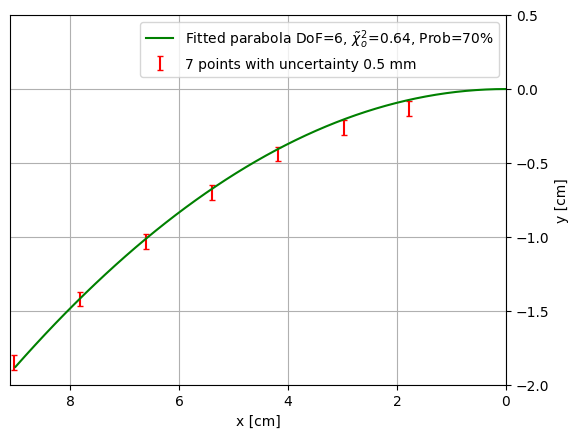

In [3]:
xdense = np.linspace(0,9)
ydense = parabola(xdense, parameters)

plt.errorbar(x, y, sigma, capsize=2, fmt='none', color='red', label=f'{x.size} points with uncertainty {sigma*10:.1f} mm')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.plot(xdense, ydense, color='green', label=fr'Fitted parabola {DoF=}, $\tilde\chi_o^2$={chi2_observed/DoF:.2f}, Prob={prob:.0f}%')
plt.legend()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.ylim(-2.0, 0.5)
plt.xlim(9.1, 0.0)
plt.show()

Conclusion: given a measurement uncertainty of $\sigma_y = 0.5 \text{mm}$ we can conclude that the trajectory is likely to be a parabolic form $y=ax^2$.

### Probability distribution

Text(0, 0.5, 'Probability obtaining $\\tilde\\chi^2 > \\tilde\\chi_o^2$')

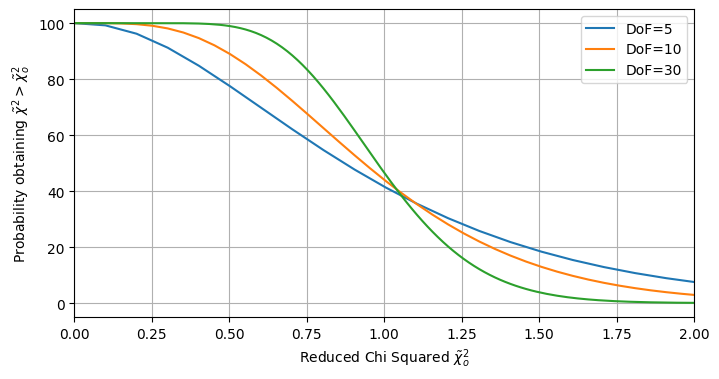

In [4]:
chi2_dense = np.linspace(0, 100,200)
fig, ax = plt.subplots(figsize=(8,4))
for DoF in [5,10, 30]:
  prob = chi2.sf(chi2_dense, DoF) * 100
  plt.plot(chi2_dense/DoF, prob, label=f'{DoF=}')


plt.legend()
plt.grid()
plt.xlim(0,2);
plt.xlabel(r'Reduced Chi Squared $\tilde\chi_o^2$')
plt.ylabel(r'Probability obtaining $\tilde\chi^2 > \tilde\chi_o^2$')


